In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("merged_output.csv")

In [3]:
def calculate_plx(row):
    if row["Plx"]>0:
        GMAG_val = row["Gmag"]+5*np.log(row["Plx"])-10
        return GMAG_val
    else:
        return None 

In [4]:
df['GMAG'] = df.apply(calculate_plx,axis = 1)

In [5]:
df.to_csv("updated_MO.csv", index = False)

In [7]:
plot_df = pd.read_csv("updated_MO.csv")

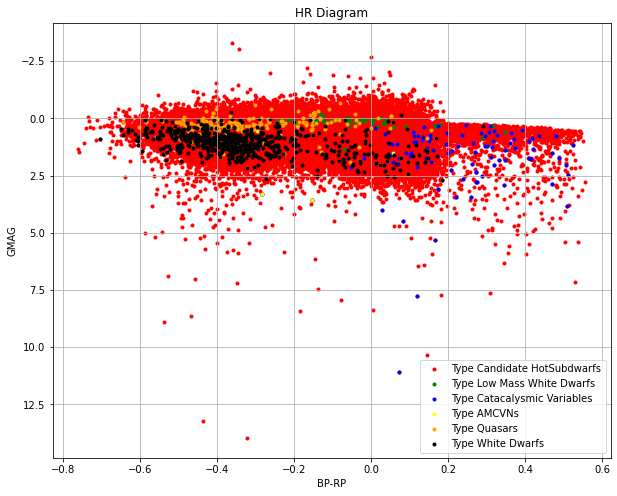

In [12]:
plt.figure(figsize = (10,8))

types = plot_df["Type"].unique()
colors = ["Red","Green", "Blue", "Yellow", "Orange", "Black"]

for i,type_value in enumerate(types):
    type_data = plot_df[plot_df["Type"] == type_value]
    plt.scatter(type_data['BP-RP'], type_data['Plx'], marker='.', color=colors[i], label=f'Type {type_value}')

plt.xlabel("BP-RP")
plt.ylabel("GMAG")
plt.title("HR Diagram")
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True)